This notebook shows how to use the output from VASP DFPT calculation and the phonopy interface to plot the phonon bandstructure.

**Requires**: phonopy package (`pip install phonopy`)

**Author**: Kiran Mathew

In [7]:
import os
import numpy as np

import pymatgen as pmg
from pymatgen.io.vasp.outputs import Vasprun

from phonopy import Phonopy
from phonopy.structure.atoms import Atoms as PhonopyAtoms

%matplotlib inline

Set the primitive cell

In [8]:
Si_primitive = PhonopyAtoms(symbols=['Si'] * 2,
                            scaled_positions=[(0, 0, 0), (0.75, 0.5, 0.75)] )
Si_primitive.set_cell([[3.867422 ,0.000000, 0.000000],
                       [1.933711, 3.349287, 0.000000],
                       [-0.000000, -2.232856, 3.157737]])

# supercell size
scell = [[2,0,0],[0,2,0],[0,0,2]]

Result from VASP DFPT calculations using the supercell structure

In [9]:
vrun = Vasprun(os.path.join(os.path.dirname(pmg.__file__), "..", 'test_files', "vasprun.xml.dfpt.phonon"))

Initialize phonopy and set the force constants obtained from VASP

In [10]:
phonon = Phonopy(Si_primitive, scell)
phonon.set_force_constants(vrun.force_constants)

Define the paths for plotting the bandstructure and set them in phonopy

In [11]:
bands = []

# path 1
q_start  = np.array([0.5, 0.5, 0.0])
q_end    = np.array([0.0, 0.0, 0.0])
band = []
for i in range(51):
    band.append(q_start + (q_end - q_start) / 50 * i)
bands.append(band)

# path 2
q_start  = np.array([0.0, 0.0, 0.0])
q_end    = np.array([0.5, 0.0, 0.0])
band = []
for i in range(51):
    band.append(q_start + (q_end - q_start) / 50 * i)
bands.append(band)

phonon.set_band_structure(bands)

True

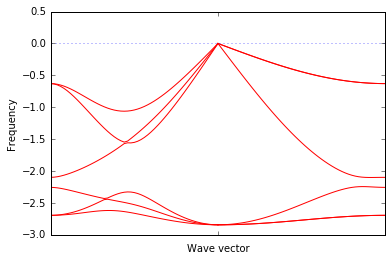

In [12]:
phonon.plot_band_structure().show()